## Food Recommender System

In [1]:
!pwd

/home/shaima/code/Alanoudis/food-delivery-rec/notebooks/alshaima


In [2]:
import pandas as pd


file_path = "/home/shaima/code/Alanoudis/food-delivery-rec/data/updated_data/orders_sg25k.txt"
orders = pd.read_csv(file_path)

orders.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


In [3]:
orders['order_id']

0            0
1            0
2            0
3            0
4            0
         ...  
24995    12177
24996    12178
24997    12179
24998    12180
24999    12180
Name: order_id, Length: 25000, dtype: int64

In [4]:
orders.shape

(25000, 9)

## Clean the Data
### Remove Unnecessary Columns

In [5]:
orders.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
orders.head(3)

,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days


In [7]:

file_path2 = "/home/shaima/code/Alanoudis/food-delivery-rec/data/raw_data/products_sg.txt"
products = pd.read_csv(file_path2)

products.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [8]:
products.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
products.head(3)

,vendor_id,product_id,name,unit_price
0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024


In [10]:

file_path3 = "/home/shaima/code/Alanoudis/food-delivery-rec/data/raw_data/vendors_sg.txt"
vendors = pd.read_csv(file_path3)

vendors.head()

,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,0,b160c319,d2786168,w21z6,mexican
1,1,9c8f010e,d2786168,w21ze,mexican
2,4,03eb25e1,5055ab25,w21ze,bak kut teh
3,5,3613129a,8984acb6,w23b1,italian
4,7,0946c9e5,1e3a2913,w21z4,bak kut teh


In [11]:
vendors.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
vendors.head(3)

,vendor_id,chain_id,geohash,primary_cuisine
0,b160c319,d2786168,w21z6,mexican
1,9c8f010e,d2786168,w21ze,mexican
2,03eb25e1,5055ab25,w21ze,bak kut teh


In [13]:

# Step 1: Merge orders with products on vendor_id and product_id
orders_products = orders.merge(products, on=['vendor_id', 'product_id'], how='left')

# Step 2: Merge the result with vendors on vendor_id
full_data = orders_products.merge(vendors, on='vendor_id', how='left')

# Preview the final merged dataset
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


In [14]:
full_data = full_data.dropna(subset=['chain_id'])
full_data.shape

(21513, 13)

In [15]:
full_data.isnull().sum()

customer_id        0
geohash_x          0
order_id           0
vendor_id          0
product_id         0
day_of_week        0
order_time         0
order_day          0
name               0
unit_price         0
chain_id           0
geohash_y          0
primary_cuisine    0
dtype: int64

### 🗺️ Geohash Distribution

<Axes: title={'center': 'Top Geohash Areas'}, xlabel='geohash'>

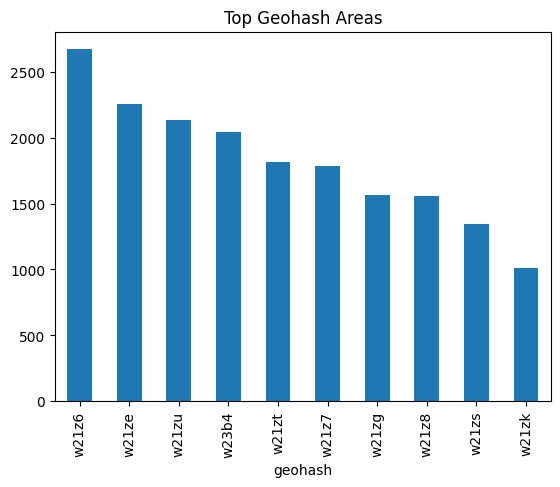

In [16]:
orders['geohash'].value_counts().head(10).plot(kind='bar', title='Top Geohash Areas')

# add rate based on vendor  

In [20]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Your cuisine mapping
global_cuisine_category = {
    "japanese": "japanese", "ramen": "japanese", "sushi": "japanese",
    "chinese": "chinese", "dim sum": "chinese", "mala xiang guo": "chinese",
    "mala soups": "chinese", "hokkien mee": "chinese", "noodles": "chinese", "tea": "chinese",
    "indian": "indian", "curry": "indian",
    "thai": "thai",
    "vietnamese": "vietnamese", "pho": "vietnamese",
    "singaporean": "singaporean", "chicken rice": "singaporean",
    "ban mian": "singaporean", "yong tau foo": "singaporean",
    "indonesian": "indonesian", "ayam penyet": "indonesian",
    "malaysian": "malaysian", "nasi lemak": "malaysian", "roti prata": "malaysian",
    "american": "american", "burgers": "american", "sandwiches": "american",
    "grill": "american", "fries": "american", "fast food": "american",
    "italian": "italian", "pizza": "italian", "pasta": "italian",
    "french": "french", "german": "german", "spanish": "spanish",
    "mexican": "mexican", "turkish": "turkish", "lebanese": "lebanese",
    "rice dishes": "asian", "fried rice": "asian", "porridge": "asian",
}

# Map cuisine to cuisine_origin (assuming you have a cuisine column in your data)
# If you already have cuisine_origin in your data, you can skip this step
if 'cuisine_origin' not in full_data.columns:
    # Replace 'cuisine_column_name' with whatever column contains the cuisine info
    full_data['cuisine_origin'] = full_data['primary_cuisine'].str.strip().map(global_cuisine_category)
    full_data['cuisine_origin'].fillna('snacks', inplace=True)

# Step 1: Calculate vendor-level statistics
vendor_stats = full_data.groupby('vendor_id').agg({
    'order_id': 'nunique',          # number of unique orders
    'customer_id': 'nunique',       # number of unique customers
    'unit_price': 'mean',           # average price
    'cuisine_origin': lambda x: x.mode()[0] if len(x) > 0 else 'other'
}).reset_index()

vendor_stats.columns = ['vendor_id', 'total_orders', 'unique_customers', 'avg_price', 'cuisine_origin']

# Step 2: Assign base rating (3.5 to 4.8) based on popularity
vendor_stats['base_rating'] = 3.5 + (
    0.3 * (vendor_stats['total_orders'] / vendor_stats['total_orders'].max()) +
    0.2 * (vendor_stats['unique_customers'] / vendor_stats['unique_customers'].max()) +
    0.8 * np.random.random(len(vendor_stats))
)

vendor_stats['base_rating'] = vendor_stats['base_rating'].clip(upper=4.8)

# Step 3: Cuisine-based rating adjustments (Asian market context)
cuisine_boost = {
    # Premium Asian cuisines (high expectations)
    'japanese': 0.25,
    'singaporean': 0.20,  # Local favorite
    'vietnamese': 0.15,
    'thai': 0.15,

    # Standard Asian cuisines
    'chinese': 0.10,
    'malaysian': 0.10,
    'indonesian': 0.10,
    'asian': 0.05,

    # Indian (variable quality perception)
    'indian': 0.05,

    # Western cuisines (premium in Asian markets)
    'italian': 0.20,
    'french': 0.25,
    'spanish': 0.15,
    'mexican': 0.10,

    # American (casual dining)
    'american': 0.05,

    # Middle Eastern
    'turkish': 0.10,
    'lebanese': 0.10,

    # European
    'german': 0.10,

    # Default
    'other': 0.0
}

vendor_stats['cuisine_adjustment'] = vendor_stats['cuisine_origin'].map(cuisine_boost).fillna(0)
vendor_stats['base_rating'] = (vendor_stats['base_rating'] + vendor_stats['cuisine_adjustment']).clip(3.0, 5.0)

# Step 4: Assign consistency based on order volume
# High volume vendors = more consistent (less variance in ratings)
vendor_stats['consistency'] = pd.cut(
    vendor_stats['total_orders'],
    bins=[0, 20, 100, np.inf],
    labels=['low', 'medium', 'high']
)

# Step 5: Chain vendors get higher consistency
if 'chain_id' in full_data.columns:
    chain_vendors = full_data[full_data['chain_id'].notna()]['vendor_id'].unique()
    vendor_stats.loc[vendor_stats['vendor_id'].isin(chain_vendors), 'consistency'] = 'high'

# Step 6: Generate rating function
def generate_vendor_rating(base_rating, consistency='medium'):
    """Generate realistic individual rating"""
    consistency_map = {'high': 0.3, 'medium': 0.5, 'low': 0.8}
    std_dev = consistency_map.get(consistency, 0.5)

    # Normal distribution around base rating
    rating = np.random.normal(base_rating, std_dev)

    # Round to nearest 0.5 (half-star system)
    rating = np.round(rating * 2) / 2

    # Clip to valid range
    return np.clip(rating, 1.0, 5.0)

# Step 7: Merge vendor stats back to main dataframe
full_data = full_data.merge(
    vendor_stats[['vendor_id', 'base_rating', 'consistency']],
    on='vendor_id',
    how='left'
)

# Step 8: Generate individual vendor ratings per row
full_data['vendor_rating'] = full_data.apply(
    lambda row: generate_vendor_rating(row['base_rating'], row['consistency']),
    axis=1
)

# Step 9: Create final table (removed primary_cuisine)
full_data = full_data[[
    'customer_id', 'geohash_x', 'order_id', 'vendor_id', 'product_id',
    'day_of_week', 'order_time', 'order_day', 'name', 'unit_price',
    'chain_id', 'geohash_y', 'cuisine_origin', 'vendor_rating'
]].copy()


# Display vendor rating statistics
print("=" * 60)
print("VENDOR RATING STATISTICS BY CUISINE")
print("=" * 60)
print(full_data.groupby('cuisine_origin')['vendor_rating'].agg(['mean', 'std', 'count']).round(2))
print("\n")
print("=" * 60)
print("TOP 10 VENDORS BY AVERAGE RATING")
print("=" * 60)
top_vendors = full_data.groupby('vendor_id').agg({
    'vendor_rating': 'mean',
    'cuisine_origin': 'first',
    'order_id': 'nunique'
}).sort_values('vendor_rating', ascending=False).head(10)
top_vendors.round(2)

/tmp/ipykernel_18567/1575975631.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['cuisine_origin'].fillna('snacks', inplace=True)


VENDOR RATING STATISTICS BY CUISINE
                mean   std  count
cuisine_origin                   
american        4.04  0.40   1182
asian           4.03  0.41   1028
chinese         4.10  0.42   4813
french          4.00  0.00      2
german          4.12  0.48      4
indian          4.04  0.42   1259
indonesian      4.06  0.38    270
italian         4.18  0.43    678
japanese        4.27  0.42   1610
malaysian       4.12  0.42    689
mexican         3.83  0.36     44
singaporean     4.22  0.43   1365
snacks          3.98  0.41   7790
spanish         4.33  0.29      3
thai            4.16  0.39    665
turkish         3.91  0.44     11
vietnamese      4.06  0.38    100


TOP 10 VENDORS BY AVERAGE RATING


,vendor_rating,cuisine_origin,order_id
vendor_id,,,
eeff118b,5.0,italian,2
23ded6fd,5.0,japanese,1
24f1c175,5.0,singaporean,2
e0306e6a,5.0,japanese,1
d92d71cf,5.0,chinese,1
c3165140,5.0,thai,1
2767f7e9,5.0,chinese,1
592ace4b,5.0,japanese,1
e445189b,5.0,japanese,1


**reduce the rows one row per each order**

In [23]:
# Aggregate data to order level
full_data = full_data.groupby(['customer_id', 'geohash_x', 'order_id', 'vendor_id']).agg({
    'day_of_week': 'first',
    'order_time': 'first',
    'order_day': 'first',
    'chain_id': 'first',
    'geohash_y': 'first',
    'cuisine_origin': 'first',
    'vendor_rating': 'mean',  # Average rating across all products in the order
    'product_id': 'count',  # Number of items in order
    'unit_price': 'sum',  # Total order value
    'name': lambda x: ', '.join(x[:3]) + ('...' if len(x) > 3 else '')  # First 3 product names
}).reset_index()

# Rename columns for clarity
full_data.rename(columns={
    'product_id': 'num_items',
    'unit_price': 'total_order_value',
    'name': 'items_ordered',
    'vendor_rating': 'avg_vendor_rating'
}, inplace=True)

# Round ratings to 1 decimal
full_data['avg_vendor_rating'] = full_data['avg_vendor_rating'].round(1)

print(f"Original rows: {len(full_data)}")
print(f"Aggregated rows: {len(full_data)}")
print("\nSample of aggregated data:")
full_data.head()


Original rows: 10581
Aggregated rows: 10581

Sample of aggregated data:


,customer_id,geohash_x,order_id,vendor_id,day_of_week,order_time,order_day,chain_id,geohash_y,cuisine_origin,avg_vendor_rating,num_items,total_order_value,items_ordered
0,008ab40ac0,w21z7,9390,8ace9ccb,2,01:52:03,3 days,aece2f12,w21z7,chinese,3.5,1,0.0004,Spicy中辣
1,008ce71183,w21zb,7057,f0d84faa,5,18:11:48,34 days,fc3b6153,w21zc,chinese,3.5,2,0.0128,"Kway Teow Goreng with Petai & Prawns 虾仁臭豆炒河粉, ..."
2,008ce71183,w21zb,7058,a23e4559,2,19:22:26,31 days,788f82f6,w21zb,american,3.8,4,0.0148,"Tuna D'Licious, Spicy Chicken Pizza Baguette, ..."
3,008ce71183,w21zb,7059,a23e4559,3,18:54:16,18 days,788f82f6,w21zb,american,3.6,4,0.0116,"Tuna D'Licious, Chocolate Eclair, Tuna D'Licio..."
4,00ba08bab4,w21zt,347,78ce75cb,3,20:39:37,39 days,24975bf7,w21zt,american,4.5,1,0.0036,McGriddles Feast


**show customer data**

In [24]:
customer_id = "008ce71183"
customer_orders = full_data[
    (full_data['customer_id'] == customer_id)
]
customer_orders

,customer_id,geohash_x,order_id,vendor_id,day_of_week,order_time,order_day,chain_id,geohash_y,cuisine_origin,avg_vendor_rating,num_items,total_order_value,items_ordered
1,008ce71183,w21zb,7057,f0d84faa,5,18:11:48,34 days,fc3b6153,w21zc,chinese,3.5,2,0.0128,"Kway Teow Goreng with Petai & Prawns 虾仁臭豆炒河粉, ..."
2,008ce71183,w21zb,7058,a23e4559,2,19:22:26,31 days,788f82f6,w21zb,american,3.8,4,0.0148,"Tuna D'Licious, Spicy Chicken Pizza Baguette, ..."
3,008ce71183,w21zb,7059,a23e4559,3,18:54:16,18 days,788f82f6,w21zb,american,3.6,4,0.0116,"Tuna D'Licious, Chocolate Eclair, Tuna D'Licio..."
